# How to use our ProjectQ QAOA for a MaxCut example

## Sample problem: graph with 3 nodes

First, let's make some imports:

In [5]:
# ProjectQ imports: QAOA and graph-to-hamiltonian converter
from QAOA import QAOA
from GraphToHamiltonian import maxcut_cost_ham, maxcut_mixer_ham
from projectq import MainEngine

# useful packages for making graphs and drawing them
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Generating a graph

Now, let's make a simple graph with 3 nodes:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


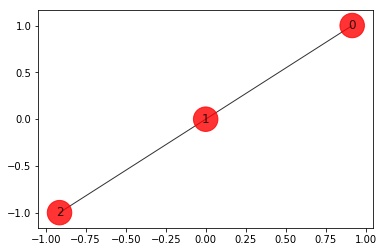

In [2]:
# generating a graph with 3 nodes
n = 3
nodes = list(range(n))
edges = [(0, 1), (1, 2)]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Let's draw this thing
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)

### Using QAOA

Now let's find the optimal assignment of 0 and 1 for each node in the above graph. First create the cost and mixer Hamiltonians needed to feed into QAOA for the graph above:

In [4]:
cost = maxcut_cost_ham(graph = G)
mixer = maxcut_mixer_ham(graph = G)
print('Cost:\n{}\n\nMixer:\n{}\n'.format(cost, mixer))

Cost:
-1.0 I +
0.5 Z0 Z1 +
0.5 Z1 Z2

Mixer:
0.0 I +
-1.0 X0 +
-1.0 X1 +
-1.0 X2



Now let's instantiate QAOA with the specified cost, mixer, number of steps, and number of "draws" (samples):

In [6]:
eng = MainEngine()
maxcut_solver = QAOA(cost = cost,
                     mixer = mixer, 
                     n_steps = 1, 
                     engine = eng, 
                     vqe_run_kwargs = {'verbose': 1, 'draws': 100})

(Note: This is the (slow) Python simulator.)


Solve for betas and gammas. All of the optimization happens here:

In [7]:
betas, gammas = maxcut_solver.solve_angles()
print("Values of betas:", betas)
print("Values of gammas:", gammas)

Iteration 1: 
  Params: [1.24945092 4.28033667] 
  Expectation: -1.25
Iteration 2: 
  Params: [1.18003698 4.72827888] 
  Expectation: -1.5700000000000003
Iteration 3: 
  Params: [1.18003698 4.72827888] 
  Expectation: -1.4600000000000002
Iteration 4: 
  Params: [1.18003698 4.72827888] 
  Expectation: -1.4699999999999998
Iteration 5: 
  Params: [1.11062304 5.17622109] 
  Expectation: -1.63
Iteration 6: 
  Params: [1.11062304 5.17622109] 
  Expectation: -1.5800000000000005
Iteration 7: 
  Params: [1.11062304 5.17622109] 
  Expectation: -1.6000000000000003
Iteration 8: 
  Params: [1.18437535 4.99891063] 
  Expectation: -1.6300000000000003
Iteration 9: 
  Params: [1.16268349 5.23843528] 
  Expectation: -1.6600000000000001
Iteration 10: 
  Params: [1.16268349 5.23843528] 
  Expectation: -1.65
Iteration 11: 
  Params: [1.19955965 5.14978006] 
  Expectation: -1.56
Iteration 12: 
  Params: [1.18871372 5.26954238] 
  Expectation: -1.66
Iteration 13: 
  Params: [1.17841009 5.22404825] 
  Expecta

Now that we have found the optimal beta and gamma values, find the most likely string, i.e. which assignment of 0's and 1's was most common. Hopefully they are the ones that actually correspond to a maximization of our initial cost function, i.e. maximizing the number of adjacent nodes with opposite value!

In [8]:
# beta and gamma values stored and used as default values in `likely_string`
draws = 1000
result = maxcut_solver.likely_string(draws = draws)
print('\nMost likely string:', result[0], 'obtained %i/%i times.' %(result[1], draws))

strings is of len 8 and is this:
 {'101': 323, '011': 112, '001': 81, '010': 313, '100': 87, '111': 9, '110': 65, '000': 10}

Most likely string: 101 obtained 323/1000 times.
